# Reading and Writing Audio Files with scipy.io

[back to overview page](index.ipynb)

The package `scipy.io` is part of [SciPy](http://www.scipy.org/), a library for scientific computing, which itself depends heavily on [NumPy](http://www.numpy.org/).

Documentation: http://docs.scipy.org/doc/scipy/reference/io.html

Audio data is stored in NumPy arrays, which is convenient.
Audio channels are represented by the columns of the array.

16-bit files are stored with data type `int16`, normalization to the range (-1, 1) must be done manually.

Advantages:

* already installed if you have SciPy
* 32-bit float files supported (since version 0.13, see https://github.com/scipy/scipy/commit/ccbdff8)
* can read some WAVEX files (but a warning message may be generated)
* works with both Python 2 and 3

Disadvantages:

* 24-bit PCM not supported
* 32-bit float WAVEX files don't work
* conversion from PCM data to floating point and normalization must be done manually
* always loads whole file, cannot read part of a file
* needs NumPy and SciPy (which is normally not a problem)

## Reading

Reading a 16-bit WAV file into a floating-point array is simple, here's the summary (you'll need [utility.py](utility.py)):

In [1]:
from scipy.io import wavfile
import utility

fs, sig = wavfile.read('data/test_wav_pcm16.wav')
normalized = utility.pcm2float(sig, 'float32')

But let's do that step-by-step, shall we? First, let's switch to inline plotting and import matplotlib and NumPy:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

All relevant functions are in the `wavfile` module from the `scipy.io` package. That's all we have to import for reading and writing WAV files:

In [3]:
from scipy.io import wavfile

Now let's open a WAV file, get some information about it, show its actual sample values and plot it:

sampling rate = 44100 Hz, length = 15 samples, channels = 7
[[ 32767  28086  23405  18724  14043   9362   4681]
 [ 29522  17511   5208  -4166  -8756  -8435  -4681]
 [ 20430  -6250 -21087 -16870  -3125   5837   4681]
 [  7291 -25305 -14593  11674  12652  -2083  -4681]
 [ -7291 -25305  14593  11674 -12652  -2083   4681]
 [-20430  -6250  21087 -16870   3125   5837  -4681]
 [-29522  17511  -5208  -4166   8756  -8435   4681]
 [-32767  28086 -23405  18724 -14043   9362  -4681]
 [-29522  17511  -5208  -4166   8756  -8435   4681]
 [-20430  -6250  21087 -16870   3125   5837  -4681]
 [ -7291 -25305  14593  11674 -12652  -2083   4681]
 [  7291 -25305 -14593  11674  12652  -2083  -4681]
 [ 20430  -6250 -21087 -16870  -3125   5837   4681]
 [ 29522  17511   5208  -4166  -8756  -8435  -4681]
 [ 32767  28086  23405  18724  14043   9362   4681]]


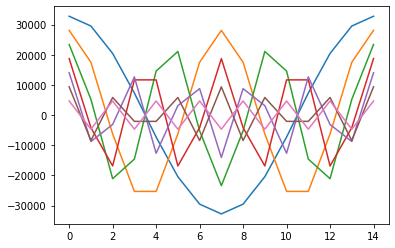

In [4]:
fs, sig = wavfile.read('data/test_wav_pcm16.wav')
print("sampling rate = {} Hz, length = {} samples, channels = {}".format(fs, *sig.shape))
print(sig)
plt.plot(sig);

So far, so good.

Before further processing, we normally want to convert the signals to floating point values and normalize them to a range from -1 to 1 by dividing all values by the largest possible value.

To do that, I wrote a little helper function called `pcm2float()`, located in the file [utility.py](utility.py), let's load it:


In [5]:
import utility

As always, you can get help with `utility.pcm2float?` and show its source code with `utility.pcm2float??`.

old dtype: int16
new dtype: float32
[[ 0.999969  0.857117  0.714264  0.571411  0.428558  0.285706  0.142853]
 [ 0.90094   0.534393  0.158936 -0.127136 -0.267212 -0.257416 -0.142853]
 [ 0.623474 -0.190735 -0.643524 -0.514832 -0.095367  0.178131  0.142853]
 [ 0.222504 -0.772247 -0.445343  0.356262  0.386108 -0.063568 -0.142853]
 [-0.222504 -0.772247  0.445343  0.356262 -0.386108 -0.063568  0.142853]
 [-0.623474 -0.190735  0.643524 -0.514832  0.095367  0.178131 -0.142853]
 [-0.90094   0.534393 -0.158936 -0.127136  0.267212 -0.257416  0.142853]
 [-0.999969  0.857117 -0.714264  0.571411 -0.428558  0.285706 -0.142853]
 [-0.90094   0.534393 -0.158936 -0.127136  0.267212 -0.257416  0.142853]
 [-0.623474 -0.190735  0.643524 -0.514832  0.095367  0.178131 -0.142853]
 [-0.222504 -0.772247  0.445343  0.356262 -0.386108 -0.063568  0.142853]
 [ 0.222504 -0.772247 -0.445343  0.356262  0.386108 -0.063568 -0.142853]
 [ 0.623474 -0.190735 -0.643524 -0.514832 -0.095367  0.178131  0.142853]
 [ 0.90094   0.

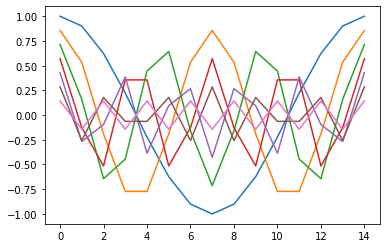

In [6]:
print("old dtype: {}".format(sig.dtype))
normalized = utility.pcm2float(sig, 'float32')
print("new dtype: {}".format(normalized.dtype))
np.set_printoptions(precision=6)
print(normalized)
plt.plot(normalized);

That's it! Now we have a floating point signal with values ranging from -1 to 1 and we can start working with it.
If you prefer double precision numbers instead of single precision, use `'float64'` instead of `'float32'`.

Let's check if WAVEX works (there might be a warning):

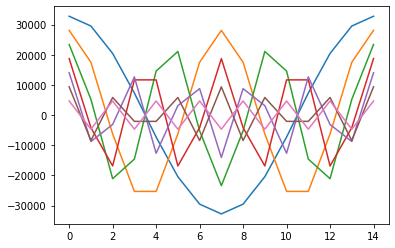

In [7]:
fs, sig = wavfile.read('data/test_wavex_pcm16.wav')
plt.plot(sig);

24-bit files may raise a `TypeError` ("data type not understood") or a `ValueError` ("total size of new array must be unchanged") or another `ValueError` ("string size must be a multiple of element size") or probably something else.
This depends on the version of SciPy (and maybe Python itself).

In [8]:
import traceback

try:
    fs, sig = wavfile.read('data/test_wav_pcm24.wav')
except:
    traceback.print_exc()
else:
    print("Surprisingly, wav_pcm24 seems to work!")
    plt.plot(sig)

try:
    fs, sig = wavfile.read('data/test_wavex_pcm24.wav')
except:
    traceback.print_exc()
else:
    print("Surprisingly, wavex_pcm24 seems to work!")
    plt.plot(sig)

Traceback (most recent call last):
  File "<ipython-input-8-fbf501df5a89>", line 4, in <module>
    fs, sig = wavfile.read('data/test_wav_pcm24.wav')
  File "/home/mg/.local/lib/python3.8/site-packages/scipy/io/wavfile.py", line 297, in read
    raise ValueError("Unsupported bit depth: the wav file "
ValueError: Unsupported bit depth: the wav file has 24-bit data.
Traceback (most recent call last):
  File "<ipython-input-8-fbf501df5a89>", line 12, in <module>
    fs, sig = wavfile.read('data/test_wavex_pcm24.wav')
  File "/home/mg/.local/lib/python3.8/site-packages/scipy/io/wavfile.py", line 297, in read
    raise ValueError("Unsupported bit depth: the wav file "
ValueError: Unsupported bit depth: the wav file has 24-bit data.


32-bit float files can be used since version 0.13 (see https://github.com/scipy/scipy/commit/ccbdff8),
but there may be warnings.

<ipython-input-9-6366f8133bc9>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, sig = wavfile.read('data/test_wav_float32.wav')


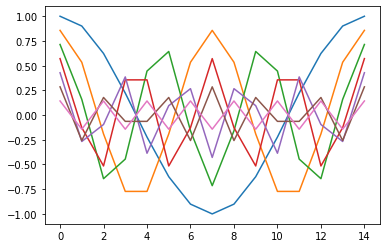

In [9]:
fs, sig = wavfile.read('data/test_wav_float32.wav')
plt.plot(sig);

32-bit float files in WAVEX format also work in recent versions of SciPy.

<ipython-input-10-eb928abd53d5>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, sig = wavfile.read('data/test_wavex_float32.wav')


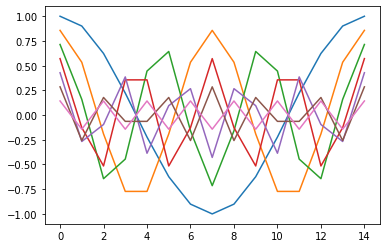

In [10]:
fs, sig = wavfile.read('data/test_wavex_float32.wav')
plt.plot(sig);

## Writing

That's easy, you just need a NumPy array with an appropriate data type where each column represents a channel of audio data:

In [11]:
data = np.array([[1.0,  -1.0],
                 [0.75, -0.75],
                 [0.5,  -0.5],
                 [0.25, -0.25]], dtype='float32')

wavfile.write('scipy_float32.wav', 44100, data)

If you want to save 16-bit PCM files, you have to provide the NumPy array with data type `'int16'`. You can use my function `float2pcm()` from [utility.py](utility.py) to do the conversion:

In [12]:
import utility

wavfile.write('scipy_pcm16.wav', 44100, utility.float2pcm(data, 'int16'))

That's it! If you want a 32-bit PCM file (which is very uncommon!), you can use `'int32'` instead of `'int16'`.

## Epilogue

Finally, let's see what versions we were using:

In [13]:
import numpy
import scipy
import IPython
print("Versions: SciPy = {}; NumPy = {}; IPython = {}".format(scipy.__version__, numpy.__version__, IPython.__version__))

import sys
print("Python interpreter:")
print(sys.version)

Versions: SciPy = 1.4.1; NumPy = 1.17.4; IPython = 7.13.0
Python interpreter:
3.8.2 (default, Apr  1 2020, 15:52:55) 
[GCC 9.3.0]


<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>